In [1]:
!pip install imblearn pycaret

You should consider upgrading via the '/home/gritti/.virtualenvs/datamining/bin/python -m pip install --upgrade pip' command.


Módulo 4 - Classificação
========================================================

Professor: Marcos Cesar Gritti  
Email: cesargritti@gmail.com

Antes de começar:
 - Crie uma cópia deste notebook, e o renomeie para "aula_1_modulo_3_{seu_nome}";
 - Caso seu ambiente Anaconda não possua uma das dependências necessárias para a execução do código contigo neste notebook, abra uma célula e execute o comando: ```!pip install -r ../requirements.txt```

Neste módulo vamos aprender sobre:
 1. **Balanceamento de classes**;
 2. **Particionamento de dados**;
 4. **Classificação**;
 
A aula de hoje será um exercício de avaliação, que deverá ser entregue no **Google Classroom**.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import make_classification
from collections import Counter

sns.set(rc={"figure.figsize": (12, 10)})

Preparando os dados para o exercício de hoje
======================================

Os dados que utilizaremos na aula de hoje serão sintéticos,  e utilizaremos a função ``make_classification`` do ``sklearn``. Geraremos os dados de forma com que haja desbalanceamento entre classes, conforme apresentado abaixo:

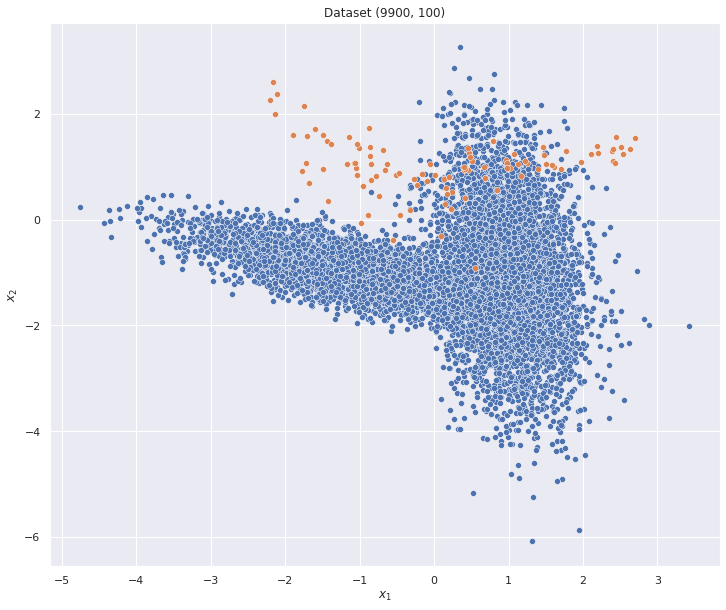

In [11]:
seed = 113 # Fixando uma semente aleatória
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=seed)

counter = Counter(y)
for label in counter:
    rows = np.where(y == label)[0]
    sns.scatterplot(x=X[rows, 0], y=X[rows, 1])
plt.title(f"Dataset ({counter[0]}, {counter[1]})")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$");

1 - Balanceamento de classes
========================

Na aula de hoje estaremos trabalhando com um conjunto de dados deslanceado para um problema de classificação binária. Nesta segunda etapa da aula de hoje, utilizaremos a biblioteca ``imblearn`` do ``python`` para aplicar
técnicas de:
- **over-sampling**, para aumentar o número de amostras da classe minoritária;
- **under-sampling**, para reduzir o número de amostras da classe majoritária;
- **combinada**: para aumentar parcialmente o número de amostras da classe minoritária, e também reduzir parcialmente o número de amostras da classe majoritária (**over-sampling** + **under-sampling**);

Segue um exemplo, na célula abaixo, do uso do método SMOTE (**Synthetic Minority Over-sampling**) para aumentar o número de amostras da classe minoritária de nosso conjunto de dados $(X, y)$.

**Exercício**  
Seguindo a construção do exemplo abaixo, aplique ao conjunto de dados um métodos de **under-sampling** e um método **combinado** (**under-sampling** com **over-sampling**), e compare os resultados.

Dicas:
  - Para **under-sampling**, utilize o algoritmo ``ClusterCentroids`` do pacote ``under_sampling`` da biblioteca ``imblearn``;
  - Para a estratégia **combinada**, utilize o algoritmo ``SMOTEENN`` do pacote ``combine`` da biblioteca ``imblearn``;

Text(0.5, 1.0, 'Oversampling (9900, 9900)')

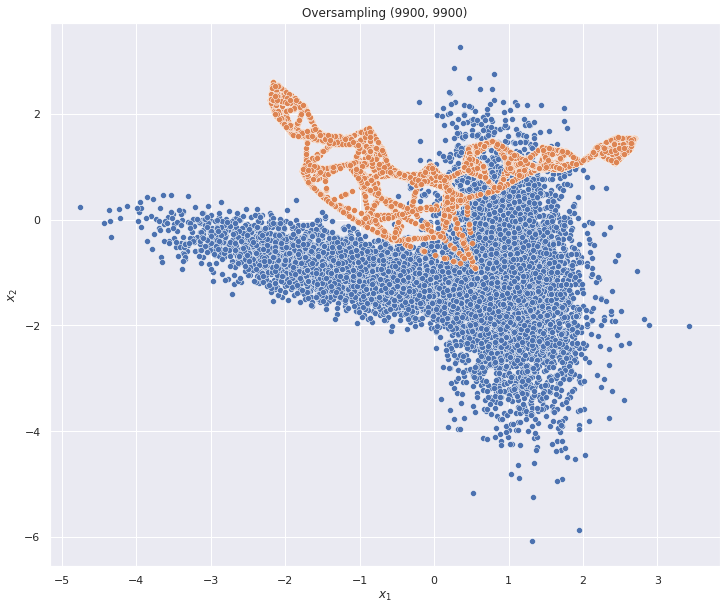

In [4]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=seed)

X_over, y_over = oversample.fit_resample(X, y)

plt.figure()
counter_over = Counter(y_over)
for label in counter_over:
    rows = np.where(y_over == label)[0]
    sns.scatterplot(x=X_over[rows, 0], y=X_over[rows, 1])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title(f"Oversampling ({counter_over[0]}, {counter_over[1]})")

2 - Particionamento de dados
========================

Particionar dados significa dividí-los em conjuntos de amostras para fins distintos. Em **Data Mining** e **Machine Learning**, é importante segregar os dados em um conjunto de **treinamento** e um conjunto de **teste**.

**Por que?**

Precisamos separar alguns dados para teste para que possamos verificar a qualidade da solução de forma justa, ou seja, em um conjunto de dados não visto previamente pelo algorítmo no momento de treinamento do modelo. Essa técnica recebe o nome de **Validação Cruzada** (*Cross Validation*). Existem várias formas de aplicar a **Validação Cruzada**:
 - Segregação em **Treinamento** e **Teste**;
 - Segregação em **Treinamento** e **Teste** com estratificação;
 - Segregação em **Treinamento**, **Teste** e **Validação**;
 - KFolds (Vários conjuntos de **Treinamento** e **Teste** para otimização de hiperparâmetros);
 - Entre outras técnicas utilizadas, por exemplo, em dados que dependem do tempo (Séries temporais);
 
Neste exercício, vamos segregar os dados em: um conjunto de **treinamento**; e um conjunto de **teste**.

**Exercício**: Particione os dados de entrada $X$ e saída $y$ da etapa anterior para que possamos dar continuidade na
análise de regressão. Para isso, crie/utiliza as células que estão entre essa seção (2) e a próxima.
Os conjuntos de treinamento e de teste devem ser salvos, respectivamente, em variáveis chamadas
`X_train`, `y_train`, `X_test` e `y_test`.

**Dica**: Procure pela documentação da função `train_test_split`, pertencente ao pacote `model_selection` da biblioteca `sklearn`. 

3 - Classificação
==============

**Exercício**: Treine três modelos de classificação (Regressão Logística, Random Forest e k-Nearst Neighbors) utilizando a biblioteca ``sklearn``. Apresente os resultados obtidos por meio de uma métrica adequeada para o problema. Assuma que detecção de classes positivas é mais importante do que a detecção de classes negativas, em outras palavras, o falsos-negativos tem maior peso do que falsos-positivos;

**Para refrescar a memória**:
- **Verdadeiro-Positivo** (TP): Quando o modelo prevê uma saída **positiva**, e a classe real de saída é realmente **positiva**;
- **Falso-Positivo** (FP): Quando o modelo prevê uma saída **positiva**, mas a classe real é **negativa**;
- **Verdadeiro-Negativo** (TN): Quando o modelo prevê uma saída **negativa**, e a classe real de saída é realmente **negativa**;
- **Falso-Negativo** (FN): Quando o modelo prevê uma saída **negativa**, mas a classe real é **positiva**;
 
Precisão: De todas as predições positivas do modelo, que proporção estava correta?
\begin{equation}
\text{Precisão} = \frac{TP}{TP + FP}
\end{equation}

Sensibilidade (ou *Recall*): De todas as classes verdadeiramente positivas, quantas o modelo conseguiu identificar?
\begin{equation}
\text{Sensibilidade} = \frac{TP}{TP + FN}
\end{equation}

F1-Score: Média harmônica entre Precisão e Sensibilidade
\begin{equation}
F_1 = 2 \frac{\text{Precisão}\,.\,\text{Sensibilidade}}{\text{Precisão}\,+\,\text{Sensibilidade}}
\end{equation}

F-Score: Generalização da média harmônica entre Precisão e Sensibilidade, que permite atribuição de pesos indicando qual das métricas é mais importante para o problema sob análise.
\begin{equation}
F_{\beta} = (1 + \beta^2) \frac{\text{Precisão}\,.\,\text{Sensibilidade}}{\beta^2\text{Precisão}\,+\,\text{Sensibilidade}}
\end{equation}

**Dicas**: Procure pelas seguintes documentações no `sklearn`:
- classe `LogisticRegression` pertencente ao pacote `linear_model`;
- classe `RandomForestClassifier` pertencente ao pacote `ensemble`;
- classe `KNeighborsClassifier`, pertencente ao pacote `neighbors`;

Pesquise e estude sobre a métrica **F2 Score**, e a implemente usando o `sklearn` para seleção de seu modelo.